In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                             recall_score, f1_score, classification_report, roc_curve, auc)


In [2]:
# Carregando o dataset Wine
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Convertendo para DataFrame
y = pd.Series(data.target, name="target")  # Convertendo para Series

In [4]:
# Exibindo as 5 primeiras linhas do dataset
print("\nAmostra dos dados:")
print(X.head())
print("\nDistribuição das classes:")
print(y.value_counts())


Amostra dos dados:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  

/tmp/ipykernel_2501/3662141383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


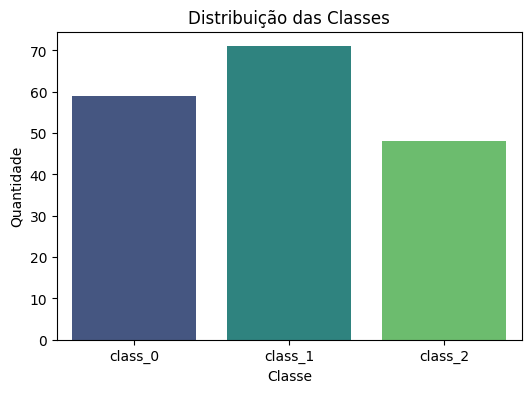

In [5]:
# Visualizando a distribuição das classes
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.title("Distribuição das Classes")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.xticks(ticks=np.arange(len(data.target_names)), labels=data.target_names)
plt.show()

In [6]:
# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Normalizando as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# dataframe para os dados ormalizados
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

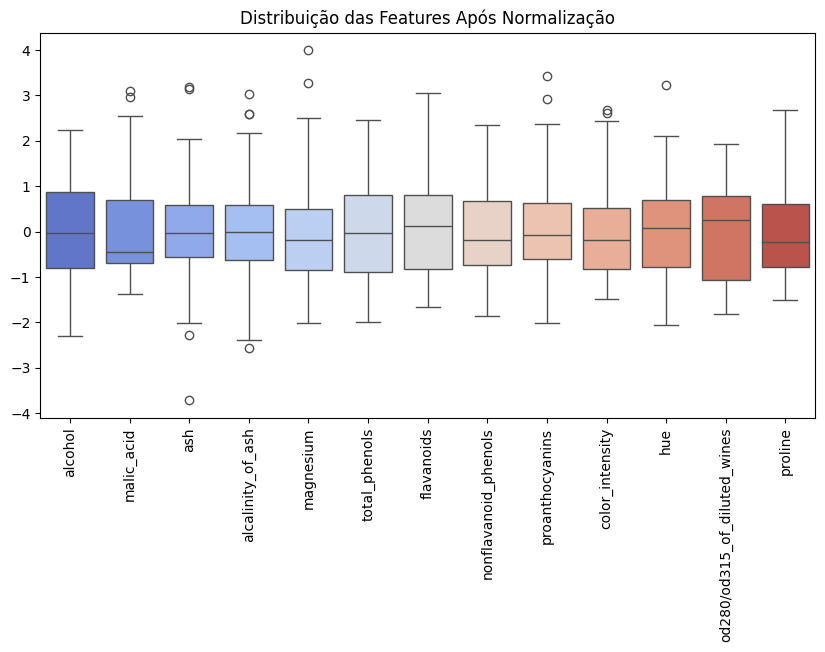

In [10]:
# Visualizando a distribuição após normalização
plt.figure(figsize=(10,5))
sns.boxplot(data=X_train, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Distribuição das Features Após Normalização")
plt.show()


In [11]:
# Implementando o classificador KNN
k = 5  # Exemplo de valor para k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [12]:
# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Organizando as metricas
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Relatório de Classificação:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
# passando a matriz de confusão para um dataframe
conf_matrix_df = pd.DataFrame(conf_matrix, index=data.target_names, columns=data.target_names)
print("\nMatriz de Confusão:")
print(conf_matrix_df)



Matriz de Confusão:
         class_0  class_1  class_2
class_0       19        0        0
class_1        1       19        1
class_2        0        0       14


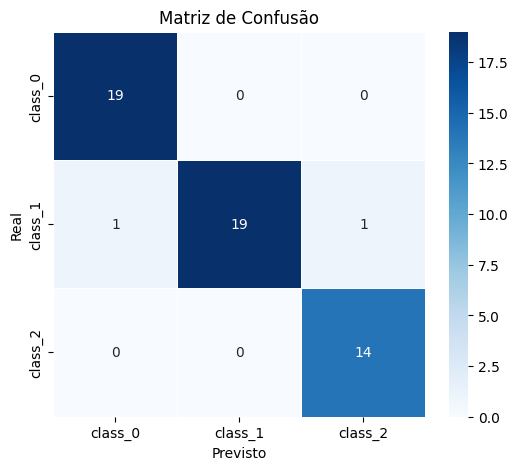

In [ ]:
#usandio um heatmap para melhor vizualisação da matriz de confusão
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_df, annot=True, cmap="Blues", fmt='d', linewidths=0.5)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [ ]:
#exibição das metricas
metrics_df = pd.DataFrame({
    "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score"],
    "Valor": [accuracy, precision, recall, f1]
})
print("\nMétricas Gerais:")
print(metrics_df)


Métricas Gerais:
    Métrica     Valor
0  Acurácia  0.962963
1  Precisão  0.965123
2    Recall  0.962963
3  F1-Score  0.962594


In [17]:
# --- Curva ROC Multiclasse ---
# Binarizando as classes
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = knn.predict_proba(X_test)


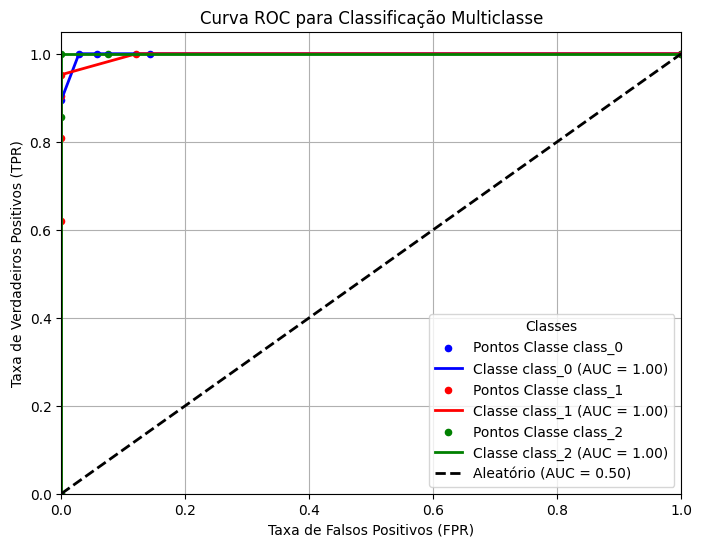

In [18]:
# Definição das classes
n_classes = y_test_bin.shape[1]
colors = ['blue', 'red', 'green']

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Adicionando os pontos de dispersão
    plt.scatter(fpr, tpr, color=colors[i], s=20, label=f'Pontos Classe {data.target_names[i]}')
    
    # Plotando a linha AUC
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Classe {data.target_names[i]} (AUC = {roc_auc:.2f})')

    # Plotando a linha de referência (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Aleatório (AUC = 0.50)")

# Configuração do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para Classificação Multiclasse')
plt.legend(loc="lower right", title="Classes")
plt.grid(True)

# Exibir o gráfico
plt.show()